# **Quais insights estatísticos podem ser extraídos dos dados do Campeonato Brasileiro Série A de 2003 até 2024?**

# Base de Dados: Campeonato Brasileiro Série A (2003-2024)

Fonte da base de dados utilizada como referência: [Dataset](https://github.com/adaoduque/Brasileirao_Dataset)

## Descrição da Base de Dados

Esta base de dados, atualizada até 10/05/2024, contém informações detalhadas sobre as partidas do Campeonato Brasileiro Série A de futebol, abrangendo as edições de 2003 a 2023, totalizando 20 anos de dados.

## Limpeza e Preparação dos Dados

Durante o processo de limpeza e preparação da base de dados, as seguintes colunas foram removidas, pois não eram relevantes para a análise e/ou estavam com valores ausentes:

- **formacao_mandante**: Formação do time mandante(irrelevante para as análises propostas).
- **formacao_visitante**: Formação do time visitante(irrelevante para as análises propostas).
- **tecnico_mandante**: Nome do técnico do time mandante(irrelevante para as análises propostas).
- **tecnico_visitante**: Nome do técnico do time visitante(irrelevante para as análises propostas).
- **mandante_Estado**: Estado do time mandante (irrelevante para as análises propostas).
- **visitante_Estado**: Estado do time visitante (irrelevante para as análises propostas).
- **hora**: Horário da partida (irrelevante para as análises propostas).


Essas colunas foram descartadas para evitar dados vazios e/ou desnecessários.

## Dicionário de Dados

Abaixo está a explicação de cada coluna presente na base de dados:

| **Coluna**            | **Descrição**                                                                                        |
|-----------------------|------------------------------------------------------------------------------------------------------|
| **ID**                | Identificador único para cada jogo.                                                                  |
| **Rodada**            | Número da rodada em que ocorreu a partida.                                                           |
| **Data**              | Data da partida (formato: DD/MM/AAAA).                                                               |
| **Hora**              | Hora em que ocorreu a partida.                                                                       |
| **Dia**               | Dia da semana em que a partida ocorreu.                                                              |
| **Mandante**          | Nome do time mandante (time que joga em casa).                                                       |
| **Visitante**         | Nome do time visitante (time que joga fora de casa).                                                 |
| **Vencedor**          | Time vencedor da partida. Se o valor for "-", significa que o jogo terminou empatado.                |
| **Arena**             | Estádio onde a partida foi realizada.                                                                |
| **Mandante Placar**   | Gols feitos pelo time mandante.                                                                      |
| **Visitante Placar**  | Gols feitos pelo time visitante.                                                                     |
| **Estado Mandante**   | Estado de origem do time mandante.                                                                   |
| **Estado Visitante**  | Estado de origem do time visitante.                                                                  |
| **Estado Vencedor**   | Estado de origem do time vencedor. Se o valor for "-", significa que o jogo terminou empatado.       |



O arquivo campeonato-brasileiro-full.csv continha apenas dados de 2003 a 2023. Para obter as informações de 2024, utilizei o ChatGPT para buscar os dados da 1ª a 38ª  rodada e os inseri manualmente no dataset atual para fins de análise.


### Amostra da base de dados original:


In [60]:
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
# Carregar o arquivo CSV
dados = pd.read_csv('db/campeonato-brasileiro-full.csv', sep=';', quotechar='"')

# Exibe as 5 primeiras linhas do dataset 
dados.head(10)

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/03/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/03/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/03/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP
5,6,1,30/03/2003,16:00,Criciuma,Fluminense,NaN,NaN,NaN,NaN,Criciuma,Heriberto Hulse,2,0,SC,RJ
6,7,1,30/03/2003,16:00,Juventude,Sao Paulo,NaN,NaN,NaN,NaN,-,Alfredo Jaconi,2,2,RS,SP
7,8,1,30/03/2003,16:00,Fortaleza,Bahia,NaN,NaN,NaN,NaN,-,Castelão,0,0,CE,BA
8,9,1,30/03/2003,16:00,Cruzeiro,Sao Caetano,NaN,NaN,NaN,NaN,-,Mineirão,2,2,MG,SP
9,10,1,30/03/2003,16:00,Vitoria,Figueirense,NaN,NaN,NaN,NaN,-,Barradão,1,1,BA,SC


### Amostra da base de dados tratada:


In [62]:
# Carregar o arquivo CSV
dados = pd.read_csv('db/campeonato-brasileiro-full.csv', sep=';', quotechar='"')

#.drop retira as colunas indesejadas para a analise
dados_limpos = dados.drop(columns=['formacao_mandante', 'formacao_visitante', 'tecnico_mandante', 'tecnico_visitante','mandante_Estado','visitante_Estado','hora'])

# Exibe as ultimas 5 linhas do dataset tratado
dados_limpos.head(-5)

,ID,rodata,data,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar
0,1,1,29/03/2003,Guarani,Vasco,Guarani,Brinco de Ouro,4,2
1,2,1,29/03/2003,Athletico-PR,Gremio,Athletico-PR,Arena da Baixada,2,0
2,3,1,30/03/2003,Flamengo,Coritiba,-,Maracanã,1,1
3,4,1,30/03/2003,Goias,Paysandu,-,Serra Dourada,2,2
4,5,1,30/03/2003,Internacional,Ponte Preta,-,Beira Rio,1,1
...,...,...,...,...,...,...,...,...,...
8759,8760,38,08/12/2024,Botafogo-RJ,Sao Paulo,Botafogo-RJ,Nilton Santos,2,1
8760,8761,38,08/12/2024,Palmeiras,Fluminense,Fluminense,Allianz Parque,0,1
8761,8762,38,08/12/2024,Atletico-MG,Athletico-PR,Atletico-MG,Independencia,1,0
8762,8763,38,08/12/2024,Flamengo,Vitoria,-,Maracana,2,2


### Substituição da coluna data
A coluna 'data' possui informações no formato '29/03/2003'.
No entanto, para a análise, a informação mais relevante é apenas o ano, e não o dia e o mês.
Portanto, para facilitar o tratamento dos dados, a coluna será substituída, criando outra mantendo somente o ano.



In [63]:
# Converte a coluna 'data' para o formato datetime, ajustando para o padrão inglês (ano-mês-dia),
# o que permite utilizar as funcionalidades da biblioteca datetime e facilitar a extração do ano.
dados_limpos['data'] = pd.to_datetime(dados_limpos['data'], dayfirst=True)

# Cria uma nova coluna chamada 'ano', extraindo apenas o ano da coluna 'data'.
# Isso só é possível pois a conversão anterior nos permite manipular facilmente as datas.
dados_limpos['ano'] = dados_limpos['data'].dt.year

# Remove a coluna 'data', já que agora temos a informação relevante (o ano) separada.
dataframe = dados_limpos.drop(columns=['data'])

# Exibe o novo DataFrame
dataframe.head(-5)


,ID,rodata,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar,ano
0,1,1,Guarani,Vasco,Guarani,Brinco de Ouro,4,2,2003
1,2,1,Athletico-PR,Gremio,Athletico-PR,Arena da Baixada,2,0,2003
2,3,1,Flamengo,Coritiba,-,Maracanã,1,1,2003
3,4,1,Goias,Paysandu,-,Serra Dourada,2,2,2003
4,5,1,Internacional,Ponte Preta,-,Beira Rio,1,1,2003
...,...,...,...,...,...,...,...,...,...
8759,8760,38,Botafogo-RJ,Sao Paulo,Botafogo-RJ,Nilton Santos,2,1,2024
8760,8761,38,Palmeiras,Fluminense,Fluminense,Allianz Parque,0,1,2024
8761,8762,38,Atletico-MG,Athletico-PR,Atletico-MG,Independencia,1,0,2024
8762,8763,38,Flamengo,Vitoria,-,Maracana,2,2,2024


In [64]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8769 entries, 0 to 8768
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                8769 non-null   int64 
 1   rodata            8769 non-null   int64 
 2   mandante          8769 non-null   object
 3   visitante         8769 non-null   object
 4   vencedor          8769 non-null   object
 5   arena             8769 non-null   object
 6   mandante_Placar   8769 non-null   int64 
 7   visitante_Placar  8769 non-null   int64 
 8   ano               8769 non-null   int32 
dtypes: int32(1), int64(4), object(4)
memory usage: 582.4+ KB


# 1 - **Qual a evolução do número total de gols por ano no Campeonato Brasileiro Série A de 2003 a 2024?**

**Objetivo:** 
- Analisar o comportamento geral do número de gols.
- Gerar Gráfico de Linha de Evolução dos Gols por Ano.

In [65]:
somaGolsMandante = dataframe['mandante_Placar'].sum()
somaGolsMandante

13469

In [66]:
somaGolsVisitantes = dataframe['visitante_Placar'].sum()
somaGolsVisitantes

9010

In [67]:
numeroPartidas=dataframe['ID'].count()

### **Total de Gols por ano**

In [68]:
#Agrupamento de gols por ano 

#Criacao de uma nova coluna com a soma dos gols
dataframe['gols']=dataframe['mandante_Placar']+dataframe['visitante_Placar']

totalGolsAno=dataframe.groupby('ano')[['gols']].sum()

totalGolsAno

,gols
ano,
2003,1592
2004,1534
2005,1451
2006,1030
2007,1047
2008,1035
2009,1094
2010,978
2011,1017


### **Gráfico de Barras**: Total de gols por ano no Campeonato Brasileiro Série A de 2003-2024:

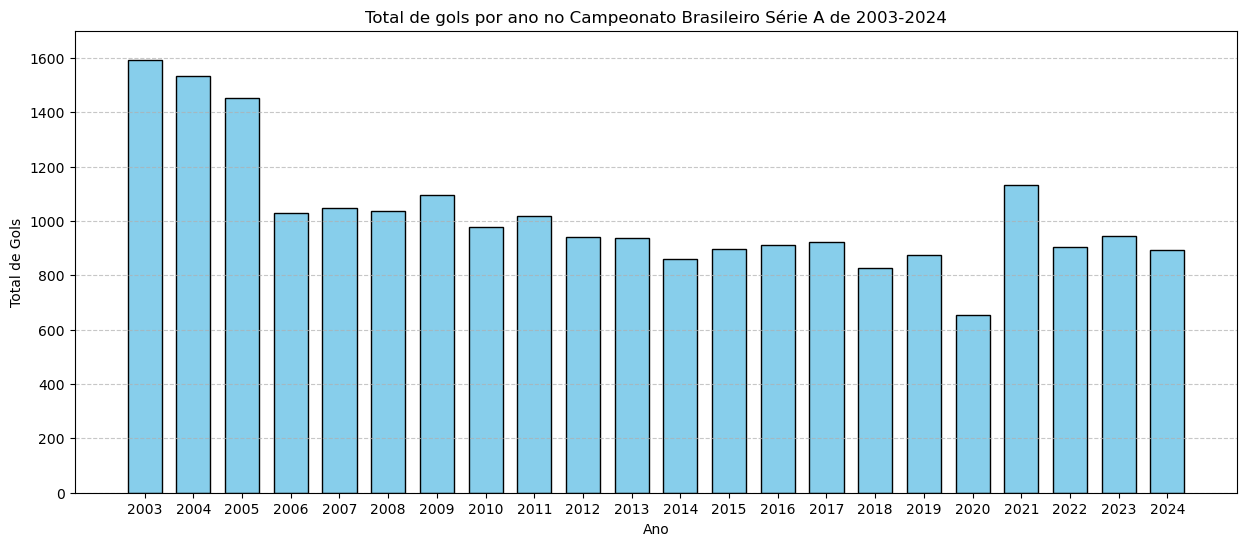

In [69]:
# Criar a figura e aumentar o tamanho
plt.figure(figsize=(15, 6))  # Largura de 15 polegadas e altura de 6 polegadas

# Criando o gráfico de barras pegando o index da análise anterior e utilizando a quantidade de gols
plt.bar(totalGolsAno.index, totalGolsAno['gols'], color='skyblue', edgecolor='black', width=0.7)

# Título do gráfico
plt.title("Total de gols por ano no Campeonato Brasileiro Série A de 2003-2024")

# Título do eixo X
plt.xlabel("Ano")
plt.xticks(range(2003, 2025, 1))  # Definindo os ticks de 1 em 1 ano

# Título do eixo Y
plt.ylabel("Total de Gols")

# Ajustando o limite do eixo Y dinamicamente para acomodar os valores dos gols
plt.ylim(0, 1700)  # Ajusta o limite Y para o valor máximo + uma margem

# Ativando o grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Exibe o gráfico
plt.show()


### **Gráfico de Linha**: Evolução dos Gols por Ano no Campeonato Brasileiro Série A 2003-2024:

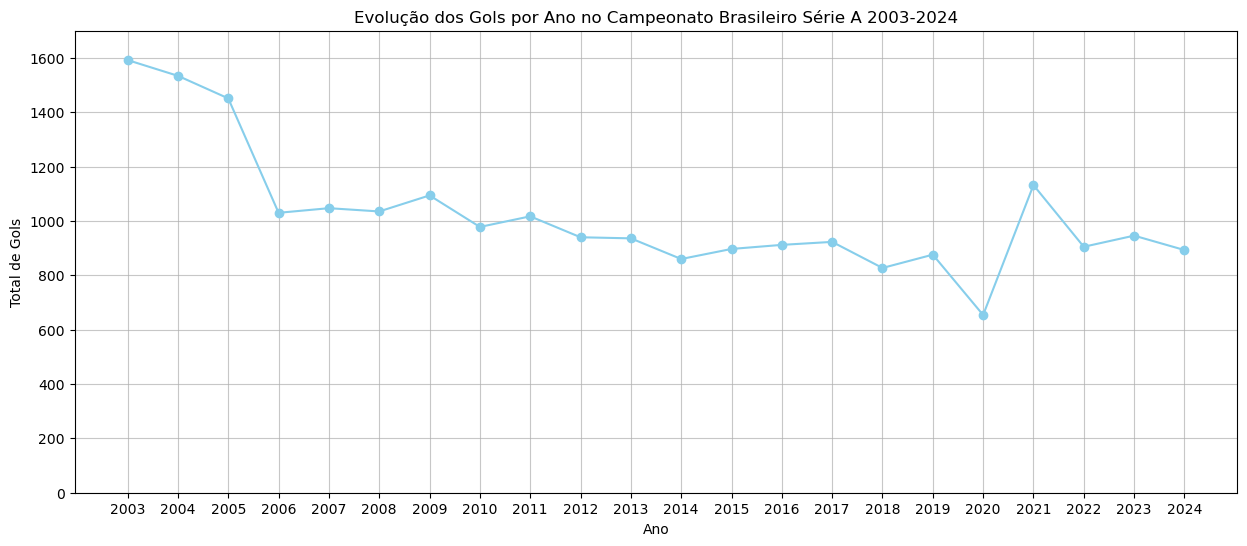

In [70]:
# Criar a figura e aumentar o tamanho
plt.figure(figsize=(15, 6))  # Largura de 15 polegadas e altura de 6 polegadas

# Criando o gráfico de barras pegando o index da análise anterior e utilizando a quantidade de gols
plt.plot(totalGolsAno.index, totalGolsAno['gols'], color='skyblue', marker='o', label='Gols por ano')

# Título do gráfico
plt.title("Evolução dos Gols por Ano no Campeonato Brasileiro Série A 2003-2024")

# Título do eixo X
plt.xlabel("Ano")
plt.xticks(range(2003, 2025, 1))  # Definindo os ticks de 1 em 1 ano

# Título do eixo Y
plt.ylabel("Total de Gols")

# Ajustando o limite do eixo Y dinamicamente para acomodar os valores dos gols
plt.ylim(0, 1700)  # Ajusta o limite Y para o valor máximo + uma margem

# Ativando o grid
plt.grid(True, alpha=0.7)

# Exibe o gráfico
plt.show()

# 2 - **Qual a Média de Gols por Ano no Campeonato Brasileiro Série A de 2003-2024?**

- ### *Qual o Ano com Maior Média de Gols por Partida?*
- ### *Qual o Ano com Menor Média de Gols por Partida?*
- ### *Qual o Desvio Padrão dos Dados?*
- ### *Como a Pandemia Afetou a Média de Gols do Campeonato?*




**Objetivo:**
- Identificar o ano com maior média de gols por partida.
- Gerar Gráfico de Linha da Média de Gols por Ano.

In [71]:
mediaGolsAno=pd.DataFrame()

# Calcular o número de partidas por ano (tamanho de cada grupo)
partidasPorAno = dataframe.groupby('ano').size()

# Calcular a média de gols por ano
mediaGolsAno['media'] = totalGolsAno['gols'] / partidasPorAno

# Exibir a média de gols por ano
mediaGolsAno.sum

<bound method DataFrame.sum of          media
ano           
2003  2.884058
2004  2.778986
2005  3.140693
2006  2.710526
2007  2.755263
2008  2.723684
2009  2.878947
2010  2.573684
2011  2.676316
2012  2.473684
2013  2.463158
2014  2.263158
2015  2.360526
2016  2.406332
2017  2.428947
2018  2.176316
2019  2.305263
2020  2.440299
2021  2.300813
2022  2.381579
2023  2.489474
2024  2.453297>

### **Qual a Média de Gols do Campeonato Todo?**

In [72]:
mediaGolsCampeonato=mediaGolsAno['media'].mean()
mediaGolsCampeonato

print(f"Média geral de gols por partida no Campeonato Brasileiro Série A (2003–2024): {mediaGolsCampeonato:.2f} gols por jogo")


Média geral de gols por partida no Campeonato Brasileiro Série A (2003–2024): 2.55 gols por jogo


### **Qual o Ano com Maior e Menor Média de Gols por Partida?**

In [73]:
# Calcular o número de partidas por ano
partidasPorAno = dataframe.groupby('ano').size()

# Calcular o total de gols por ano
totalGolsAno = dataframe.groupby('ano')['gols'].sum()

# Calcular a média de gols por ano
mediaGolsAno = pd.DataFrame()
mediaGolsAno['media'] = totalGolsAno / partidasPorAno

# Encontrar o valor máximo e o ano correspondente
maiorMedia = mediaGolsAno['media'].max()
anoMaiorMedia = mediaGolsAno['media'].idxmax()

# Encontrar o valor minimo e o ano correspondente
menorMedia = mediaGolsAno['media'].min()
anoMenorMedia = mediaGolsAno['media'].idxmin()

# Exibir resultado formatado
print(f"O ano com a MAIOR média de gols foi: {anoMaiorMedia} com {maiorMedia:.2f} gols por partida.")
print(f"O ano com a MENOR média de gols foi: {anoMenorMedia} com {menorMedia:.2f} gols por partida.")

O ano com a MAIOR média de gols foi: 2005 com 3.14 gols por partida.
O ano com a MENOR média de gols foi: 2018 com 2.18 gols por partida.


### **Qual o Desvio Padrão da Média de Gols por Partida?**

In [74]:
# Calculando o desvio padrão da média de gols por partida com o .std()
desvio_padrao = mediaGolsAno['media'].std()

# Imprimindo o resultado e interpretação
print(f"Desvio padrão da média de gols por partida (2003–2024) foi de {desvio_padrao:.2f}\n")
print("O desvio padrão de aproximadamente 0.24 indica que a média de gols por partida se manteve bastante estável entre 2003 e 2024, "
      "com pouca variação ao longo dos anos (quanto mais próximo de zero, mais estável).\n"
      "Isso demonstra consistência no padrão ofensivo do campeonato.")


Desvio padrão da média de gols por partida (2003–2024) foi de 0.24

O desvio padrão de aproximadamente 0.24 indica que a média de gols por partida se manteve bastante estável entre 2003 e 2024, com pouca variação ao longo dos anos (quanto mais próximo de zero, mais estável).
Isso demonstra consistência no padrão ofensivo do campeonato.


### **Qual a Média de Gols Pré e Pós-Pandemia? (A pandemia afetou a média de gols por campeonato?)**

In [75]:
# Média de gols após 2020 (pós-pandemia)
media_anos_pos = mediaGolsAno.loc[mediaGolsAno.index >= 2020, 'media'].mean()

# Média de gols antes de 2020 (pré-pandemia)
media_anos_pre = mediaGolsAno.loc[mediaGolsAno.index < 2020, 'media'].mean()

# Exibindo as médias calculadas
print(f"Média de gols nos anos antes da pandemia (2003–2019): {media_anos_pre:.2f}")
print(f"Média de gols nos anos pós-pandemia (2020–2024): {media_anos_pos:.2f}")

# Calculando o desvio padrão da média de gols por partida com o .std() pré e pós-pandemia
desvio_padraoPos = mediaGolsAno.loc[mediaGolsAno.index >= 2020, 'media'].std()
desvio_padraoPre = mediaGolsAno.loc[mediaGolsAno.index < 2020, 'media'].std()

# Exibindo os desvios padrão calculados
print()
print(f"Desvio padrão dos anos antes da pandemia (2003–2019): {desvio_padraoPre:.2f}")
print(f"Desvio padrão dos anos pós-pandemia (2020–2024): {desvio_padraoPos:.2f}")
print()

# Analisando o impacto da pandemia no desvio padrão
if desvio_padraoPos == desvio_padraoPre:
    print("A pandemia NÃO AFETOU significativamente a variação na média de gols por partida.")
elif desvio_padraoPos > desvio_padraoPre:
    print("A pandemia AUMENTOU a variação na média de gols por partida, indicando possíveis mudanças no estilo de jogo.")
else:
    print("A pandemia REDUZIU a variação na média de gols por partida, sugerindo maior consistência nos jogos pós-pandemia.")


Média de gols nos anos antes da pandemia (2003–2019): 2.59
Média de gols nos anos pós-pandemia (2020–2024): 2.41

Desvio padrão dos anos antes da pandemia (2003–2019): 0.26
Desvio padrão dos anos pós-pandemia (2020–2024): 0.07

A pandemia REDUZIU a variação na média de gols por partida, sugerindo maior consistência nos jogos pós-pandemia.


### **Gráfico de Linha**: Evolução da Media de Gol-Partida por Ano no Campeonato Brasileiro Série A 2003-2024:

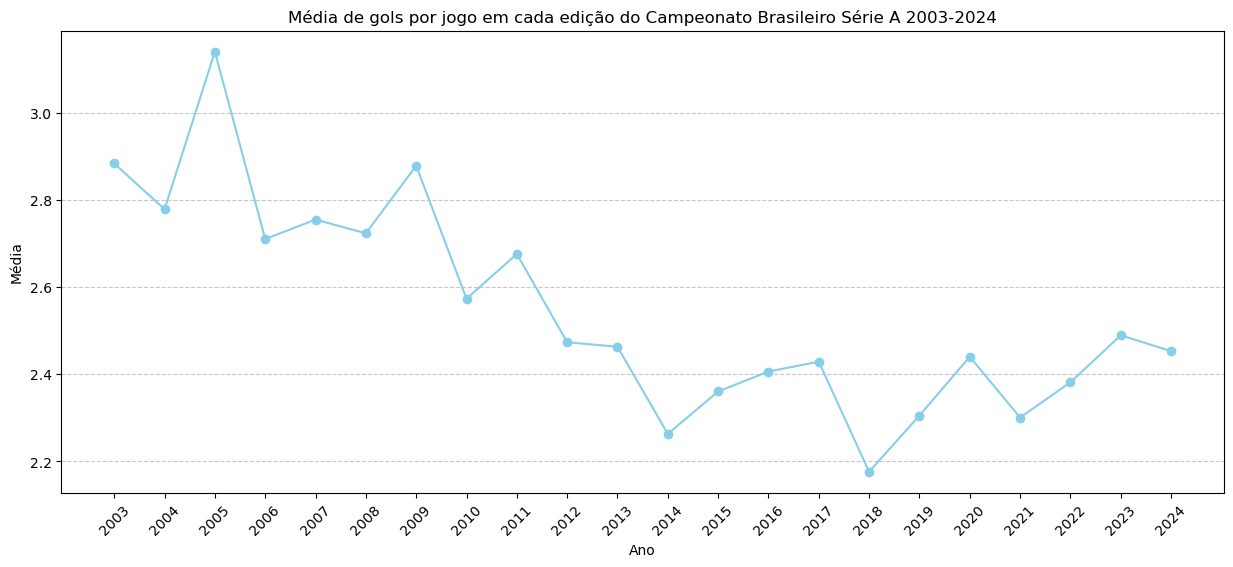

In [76]:
# Criar a figura e aumentar o tamanho
plt.figure(figsize=(15, 6))  # Largura de 15 polegadas e altura de 6 polegadas

# Criando o gráfico de barras pegando o índice da análise anterior e utilizando a quantidade de gols
plt.plot(mediaGolsAno.index, mediaGolsAno['media'], color='skyblue', marker='o')

# Título do gráfico
plt.title("Média de gols por jogo em cada edição do Campeonato Brasileiro Série A 2003-2024")

# Título do eixo X
plt.xlabel("Ano")
plt.xticks(range(2003, 2025, 1), rotation=45)  # Definindo os ticks de 1 em 1 ano

# Título do eixo Y
plt.ylabel("Média")

# Ativando o grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Exibe o gráfico
plt.show()

# 3 - **Qual o Placar Mais Comum?**

*Identificar o placar mais frequente no campeonato*

**Objetivo:**
   - Identificar o placar mais frequente no campeonato.
   - Gerar Gráfico de Barras de Distribuição dos Placares mais Frequentes.

In [77]:
placarMaisFrequente=dataframe[['mandante_Placar','visitante_Placar']].value_counts().idxmax() #value_counts conta cada par,idxmax pega a combinacao mais frequente
frequencia = dataframe[['mandante_Placar', 'visitante_Placar']].value_counts().max() #.max pega qntas vezes apareceu

print(f"Placar mais frequente: {placarMaisFrequente[0]}x{placarMaisFrequente[1]} - Apareceu {frequencia} vezes")

Placar mais frequente: 1x0 - Apareceu 1157 vezes


In [78]:
# Conta todas as combinações de placar e pega as 10 mais frequentes
placarMaisFrequente = dataframe[['mandante_Placar', 'visitante_Placar']].value_counts().head(10)

# Exibe
for (mandante, visitante), frequencia in placarMaisFrequente.items():
    print(f"Placar mais frequente: {mandante}x{visitante} - Apareceu {frequencia} vezes")

Placar mais frequente: 1x0 - Apareceu 1157 vezes
Placar mais frequente: 1x1 - Apareceu 1089 vezes
Placar mais frequente: 2x1 - Apareceu 861 vezes
Placar mais frequente: 2x0 - Apareceu 745 vezes
Placar mais frequente: 0x0 - Apareceu 691 vezes
Placar mais frequente: 0x1 - Apareceu 623 vezes
Placar mais frequente: 1x2 - Apareceu 546 vezes
Placar mais frequente: 2x2 - Apareceu 451 vezes
Placar mais frequente: 3x0 - Apareceu 387 vezes
Placar mais frequente: 3x1 - Apareceu 385 vezes


In [79]:
placarMaisFrequente.index

MultiIndex([(1, 0),
            (1, 1),
            (2, 1),
            (2, 0),
            (0, 0),
            (0, 1),
            (1, 2),
            (2, 2),
            (3, 0),
            (3, 1)],
           names=['mandante_Placar', 'visitante_Placar'])

### **Gráfico de Barras**: 10 placares mais comuns do campeonato brasileiro 2003-2024:

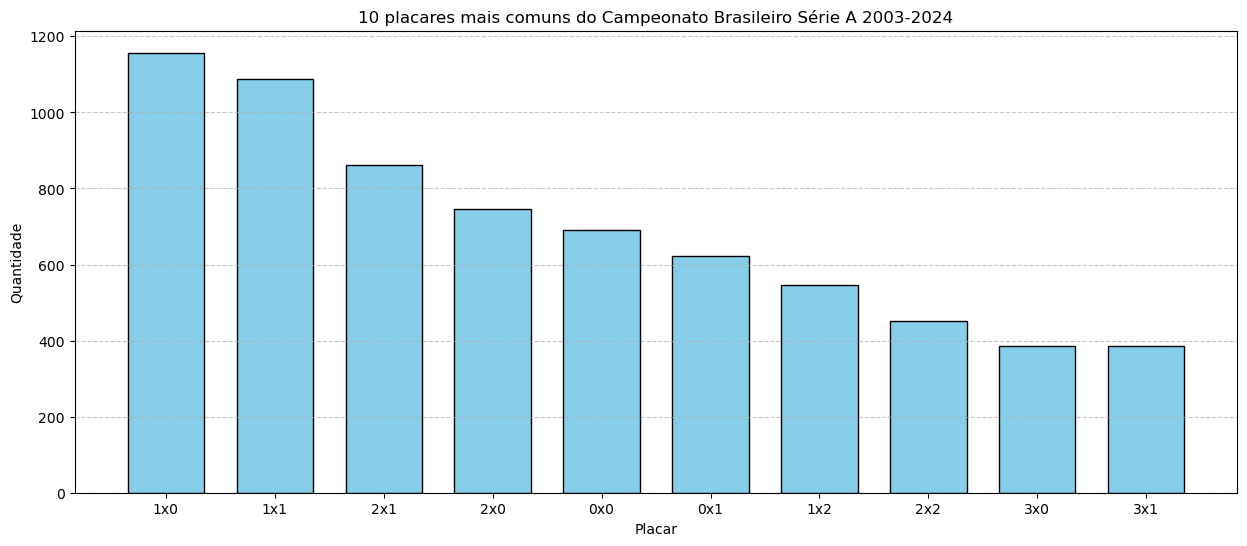

In [80]:
#Convertendo as tuplas em strings
placares = []
for tupla in placarMaisFrequente.index:
    mandante = tupla[0]
    visitante = tupla[1]
    placares.append(f"{mandante}x{visitante}")
    
# Criar a figura e aumentar o tamanho
plt.figure(figsize=(15, 6))  # Largura de 15 polegadas e altura de 6 polegadas

# Criando o gráfico de barras pegando o index da análise anterior e utilizando a quantidade de gols
plt.bar(placares, placarMaisFrequente.values, color='skyblue', edgecolor='black', width=0.7)

# Título do gráfico
plt.title("10 placares mais comuns do Campeonato Brasileiro Série A 2003-2024")

# Título do eixo X
plt.xlabel("Placar")


# Título do eixo Y
plt.ylabel("Quantidade")

# Ativando o grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Exibe o gráfico
plt.show()

# 4 - **Qual o Clube com Mais Vitórias como Mandante (melhor mandante)?**

Identificar o time com mais vitórias como mandante.

**Objetivo:**
   -  Identificar o time com mais vitórias como mandante.
   - Gerar Gráfico de Barras das Vitórias como Mandante por Time.

In [81]:
dataframe[['mandante','vencedor']]

,mandante,vencedor
0,Guarani,Guarani
1,Athletico-PR,Athletico-PR
2,Flamengo,-
3,Goias,-
4,Internacional,-
...,...,...
8764,Juventude,Cruzeiro
8765,Bahia,Bahia
8766,Bragantino,Bragantino
8767,Cuiaba,Vasco


In [82]:
dataframe[['mandante','vencedor']].value_counts().head(12)

mandante       vencedor     
Sao Paulo      Sao Paulo        247
Internacional  Internacional    238
Flamengo       Flamengo         235
Santos         Santos           230
Athletico-PR   Athletico-PR     227
Palmeiras      Palmeiras        226
Gremio         Gremio           226
Atletico-MG    Atletico-MG      225
Corinthians    Corinthians      218
Fluminense     Fluminense       213
Cruzeiro       Cruzeiro         199
Botafogo-RJ    Botafogo-RJ      173
Name: count, dtype: int64

In [83]:
partidasCasa=dataframe['mandante'].value_counts()
partidasCasa

mandante
Sao Paulo          427
Fluminense         427
Flamengo           425
Athletico-PR       410
Santos             409
Atletico-MG        408
Internacional      407
Corinthians        406
Gremio             387
Palmeiras          387
Botafogo-RJ        369
Cruzeiro           369
Vasco              331
Goias              295
Coritiba           295
Bahia              231
Figueirense        219
Vitoria            216
Sport              209
Ponte Preta        181
Fortaleza          176
Juventude          161
Atletico-GO        154
Avai               133
Ceara              133
Chapecoense        132
Parana             124
America-MG         114
Criciuma           101
Bragantino          97
Nautico             95
Sao Caetano         86
Cuiaba              74
Paysandu            67
Guarani             65
Portuguesa          57
Santa Cruz          38
Brasiliense         21
Santo Andre         19
Barueri             19
Ipatinga            19
America-RN          19
Gremio Prudente     19
Jo

### **Melhor mandante:**

In [84]:
maisVitorias=dataframe[['mandante','vencedor']].value_counts().idxmax() #value_counts conta cada par,idxmax pega a combinacao mais frequente
frequencia = dataframe[['mandante','vencedor']].value_counts().max() #.max pega qntas vezes apareceu

print(f"O time que mais venceu partidas como mandante foi o {maisVitorias[0]} que jogou em casa {partidasCasa[maisVitorias[0]]} vezes e venceu {frequencia} vezes")

O time que mais venceu partidas como mandante foi o Sao Paulo que jogou em casa 427 vezes e venceu 247 vezes


### **Porcentagem de vitorias em casa:**

In [85]:
# Contando as partidas como mandante
partidasCasa = dataframe['mandante'].value_counts().reset_index()
partidasCasa.columns = ['Mandante', 'JogosCasa']

# Contando as vitórias como mandante
vitoriasCasa = dataframe[dataframe['mandante'] == dataframe['vencedor']]['mandante'].value_counts().reset_index()
vitoriasCasa.columns = ['Mandante', 'VitoriasCasa']

# Juntando as informações de JogosCasa e VitoriasCasa
partidasCasa = pd.merge(partidasCasa, vitoriasCasa, on='Mandante', how='left')

# Exibindo o DataFrame resultante
partidasCasa

,Mandante,JogosCasa,VitoriasCasa
0,Sao Paulo,427,247
1,Fluminense,427,213
2,Flamengo,425,235
3,Athletico-PR,410,227
4,Santos,409,230
5,Atletico-MG,408,225
6,Internacional,407,238
7,Corinthians,406,218
8,Gremio,387,226
9,Palmeiras,387,226


In [86]:
#Porcentagem de vitorias em casa por equipe que disputou o campeonato brasileiro de 2003-2023
partidasCasa['porcentagemVitoriaCasa']=(partidasCasa['VitoriasCasa']/partidasCasa['JogosCasa'])*100

partidasCasa

,Mandante,JogosCasa,VitoriasCasa,porcentagemVitoriaCasa
0,Sao Paulo,427,247,57.845433
1,Fluminense,427,213,49.882904
2,Flamengo,425,235,55.294118
3,Athletico-PR,410,227,55.365854
4,Santos,409,230,56.234719
5,Atletico-MG,408,225,55.147059
6,Internacional,407,238,58.476658
7,Corinthians,406,218,53.694581
8,Gremio,387,226,58.397933
9,Palmeiras,387,226,58.397933


### **Gráfico de Barras**: Relação Jogos em Casa e Vitórias em Casa - Campeonato Brasileiro Série A 2003-2024

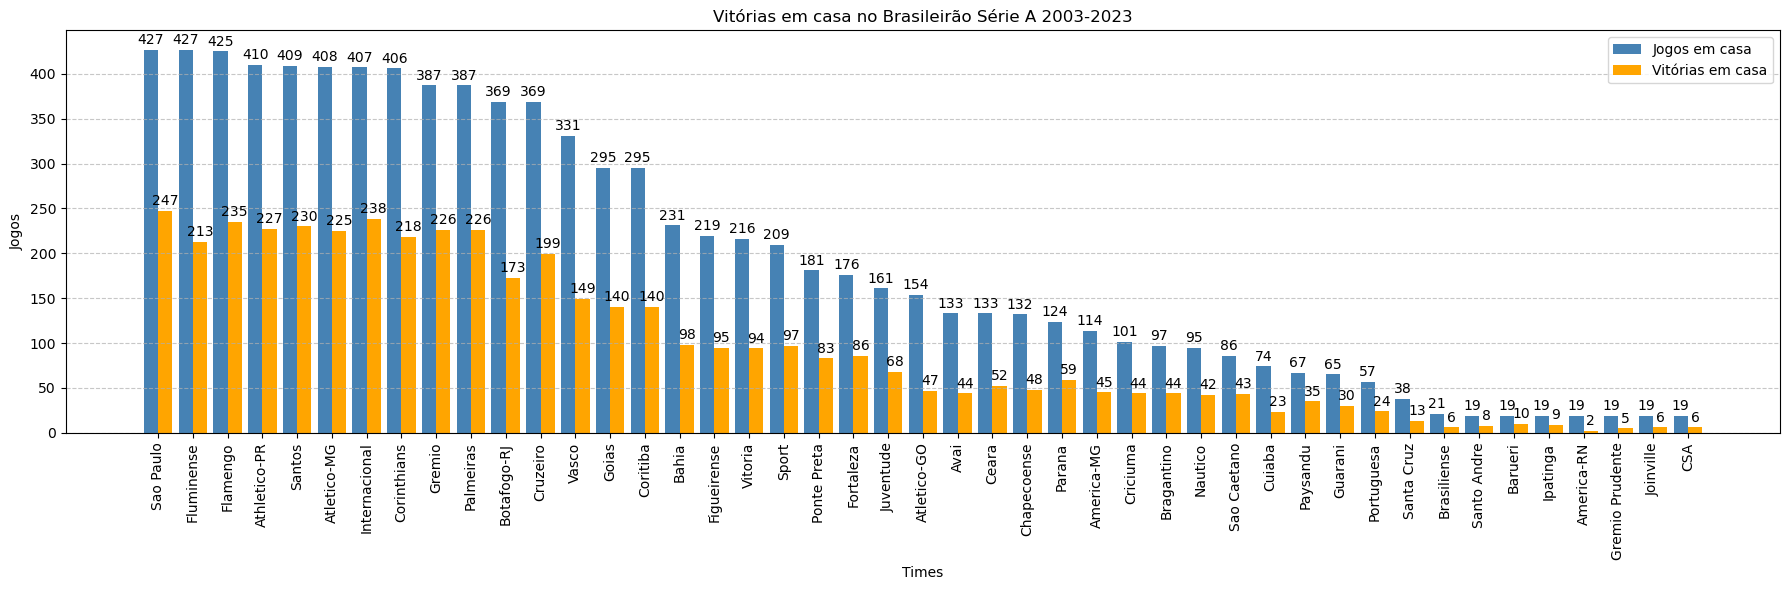

In [87]:
# Dados
mandante = partidasCasa['Mandante']
jogosCasa = partidasCasa['JogosCasa']
vitoriasCasa = partidasCasa['VitoriasCasa']

# Criar posições base
x = list(range(len(mandante)))
largura = 0.41  # Largura das barras

# Criar a figura
plt.figure(figsize=(18, 6))

# Criar barras com deslocamento manual no eixo X
bar = plt.bar([i - largura/2 for i in x], jogosCasa, width=largura, label='Jogos em casa', color='steelblue')
bar2 = plt.bar([i + largura/2 for i in x], vitoriasCasa, width=largura, label='Vitórias em casa', color='orange')

# Adiciona os valores sobre as barras
plt.bar_label(bar, padding=2)
plt.bar_label(bar2, padding=2)

# Títulos e eixos
plt.title("Vitórias em casa no Brasileirão Série A 2003-2023")
plt.xlabel("Times")
plt.ylabel("Jogos")
plt.xticks(x, mandante, rotation=90)

# Grade e legenda
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()


### **Qual clube com Mais Gols Feitos como Mandante?**
    -   Identificar o time com mais gols feitos em casa.
    -   Gerar Gráfico de Barras do Total de Gols Feitos em Casa por Time (10 melhores). 

In [88]:
#Agrupa os mandantes por mandante_Placar e faz a soma dos valores, depois ordena em ordem decrescente com ascending=False
golsMandante = dataframe.groupby('mandante')['mandante_Placar'].sum().sort_values(ascending=False)
time_mais_gols = golsMandante.idxmax()
qtd_gols = golsMandante.max()

print(f"O time que mais fez gols como mandante foi o {time_mais_gols} com {qtd_gols} gols.")

O time que mais fez gols como mandante foi o Santos com 728 gols.


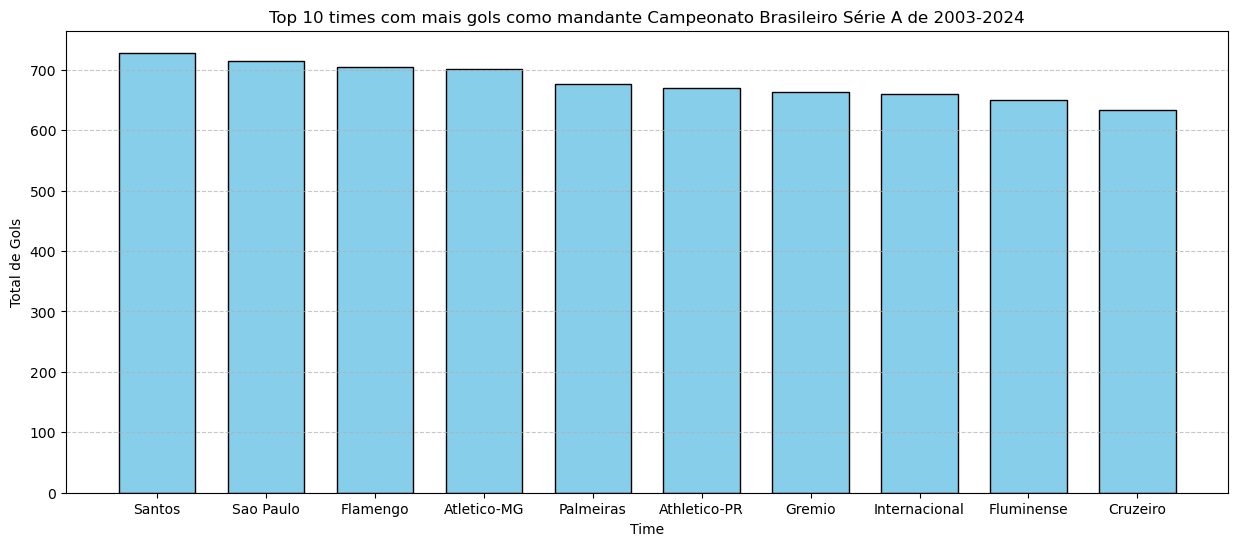

In [89]:
# Criar a figura e aumentar o tamanho
plt.figure(figsize=(15, 6))  # Largura de 15 polegadas e altura de 6 polegadas

# Criando o gráfico de barras utilizando a série 'golsMandante', que contém os times e seus respectivos gols
plt.bar(golsMandante.head(10).index, golsMandante.head(10).values, color='skyblue', edgecolor='black', width=0.7)

# Título do gráfico
plt.title("Top 10 times com mais gols como mandante Campeonato Brasileiro Série A de 2003-2024")

# Título do eixo X
plt.xlabel("Time")

# Título do eixo Y
plt.ylabel("Total de Gols")

# Ativando o grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Exibe o gráfico
plt.xticks(rotation=0)  # Rotaciona os nomes dos times para melhor visualização
plt.show()

# 5 - **Qual o Clube com Mais Vitórias como Visitante (melhor visitante)?**

**Objetivo:**
   - Identificar o time com mais vitórias como visitante (2003-2024).
   - Gerar Gráfico de Barras das Vitórias como Visitante por Time.


In [90]:
dataframe[['visitante','vencedor']]

,visitante,vencedor
0,Vasco,Guarani
1,Gremio,Athletico-PR
2,Coritiba,-
3,Paysandu,-
4,Ponte Preta,-
...,...,...
8764,Cruzeiro,Cruzeiro
8765,Atletico-GO,Bahia
8766,Criciuma,Bragantino
8767,Vasco,Vasco


In [91]:
dataframe[['visitante','vencedor']].value_counts().head(12)

visitante      vencedor     
Flamengo       Flamengo         141
Sao Paulo      Sao Paulo        136
Palmeiras      Palmeiras        126
Corinthians    -                123
               Corinthians      123
Sao Paulo      -                122
Fluminense     Fluminense       122
Flamengo       -                121
Atletico-MG    -                121
Cruzeiro       Cruzeiro         119
Palmeiras      -                116
Internacional  Internacional    115
Name: count, dtype: int64

In [92]:
partidasFora=dataframe['visitante'].value_counts()
partidasFora

visitante
Flamengo           428
Fluminense         427
Sao Paulo          426
Corinthians        411
Santos             409
Athletico-PR       408
Internacional      406
Atletico-MG        406
Gremio             389
Palmeiras          385
Cruzeiro           370
Botafogo-RJ        365
Vasco              332
Coritiba           295
Goias              295
Bahia              231
Figueirense        219
Vitoria            217
Sport              209
Ponte Preta        181
Fortaleza          178
Juventude          161
Atletico-GO        150
Avai               133
Chapecoense        133
Ceara              133
Parana             124
America-MG         114
Criciuma           105
Nautico             95
Bragantino          93
Sao Caetano         86
Cuiaba              74
Paysandu            67
Guarani             65
Portuguesa          57
Santa Cruz          38
Brasiliense         21
Barueri             19
Santo Andre         19
Ipatinga            19
Gremio Prudente     19
Joinville           19
C

### **Melhor Visitante:**

In [93]:
maisVitorias=dataframe[['visitante','vencedor']].value_counts().idxmax() #value_counts conta cada par,idxmax pega a combinacao mais frequente
frequencia = dataframe[['visitante','vencedor']].value_counts().max() #.max pega qntas vezes apareceu

print(f"O time que mais venceu partidas como visitante foi o {maisVitorias[0]} que jogou fora de casa {partidasFora[maisVitorias[0]]} vezes e venceu {frequencia} vezes")

O time que mais venceu partidas como visitante foi o Flamengo que jogou fora de casa 428 vezes e venceu 141 vezes


### **Porcentagem de vitoria fora de casa**

In [94]:
# Contando as partidas como visitante
partidasFora = dataframe['visitante'].value_counts().reset_index()
partidasFora.columns = ['visitante', 'JogosFora']

# Contando as vitórias como visitante
vitoriasFora = dataframe[dataframe['visitante'] == dataframe['vencedor']]['visitante'].value_counts().reset_index()
vitoriasFora.columns = ['visitante', 'VitoriasFora']

# Juntando as informações de JogosFora e VitoriasFora
partidasFora = pd.merge(partidasFora, vitoriasFora, on='visitante', how='left')

# Substituir valores NaN por 0 na coluna 'VitoriasFora'
partidasFora['VitoriasFora'] = partidasFora['VitoriasFora'].fillna(0)

partidasFora

,visitante,JogosFora,VitoriasFora
0,Flamengo,428,141.0
1,Fluminense,427,122.0
2,Sao Paulo,426,136.0
3,Corinthians,411,123.0
4,Santos,409,110.0
5,Athletico-PR,408,91.0
6,Internacional,406,115.0
7,Atletico-MG,406,114.0
8,Gremio,389,101.0
9,Palmeiras,385,126.0


In [95]:
porcentagemVitoriasFora = (partidasFora['VitoriasFora'] / partidasFora['JogosFora'])*100

porcentagemVitoriasFora

0     32.943925
1     28.571429
2     31.924883
3     29.927007
4     26.894866
5     22.303922
6     28.325123
7     28.078818
8     25.964010
9     32.727273
10    32.162162
11    26.027397
12    21.987952
13    16.610169
14    23.389831
15    18.614719
16    21.461187
17    19.815668
18    16.267943
19    17.127072
20    22.471910
21    17.391304
22    20.666667
23    16.541353
24    16.541353
25    15.037594
26    19.354839
27    11.403509
28    13.333333
29    12.631579
30    22.580645
31    25.581395
32    24.324324
33     8.955224
34     9.230769
35    12.280702
36     5.263158
37    19.047619
38    10.526316
39    15.789474
40     0.000000
41    10.526316
42     5.263158
43    10.526316
44    10.526316
dtype: float64

In [96]:
#Inclui a coluna no dataframe
partidasFora['porcentagemVitoriasFora'] = porcentagemVitoriasFora

partidasFora

,visitante,JogosFora,VitoriasFora,porcentagemVitoriasFora
0,Flamengo,428,141.0,32.943925
1,Fluminense,427,122.0,28.571429
2,Sao Paulo,426,136.0,31.924883
3,Corinthians,411,123.0,29.927007
4,Santos,409,110.0,26.894866
5,Athletico-PR,408,91.0,22.303922
6,Internacional,406,115.0,28.325123
7,Atletico-MG,406,114.0,28.078818
8,Gremio,389,101.0,25.964010
9,Palmeiras,385,126.0,32.727273


### **Qual o Top 5 melhores visitantes?**

In [97]:
top5 = partidasFora.sort_values('porcentagemVitoriasFora', ascending=False).head(5)

for i, row in enumerate(top5.itertuples(), start=1):
    print(f"TOP {i} - {row.visitante}: {row.porcentagemVitoriasFora:.2f}% de vitórias fora de casa")



TOP 1 - Flamengo: 32.94% de vitórias fora de casa
TOP 2 - Palmeiras: 32.73% de vitórias fora de casa
TOP 3 - Cruzeiro: 32.16% de vitórias fora de casa
TOP 4 - Sao Paulo: 31.92% de vitórias fora de casa
TOP 5 - Corinthians: 29.93% de vitórias fora de casa


### **Gráfico de Barras**: Relação Jogos Fora de Casa e Vitórias Fora de Casa - Campeonato Brasileiro Série A 2003-2024

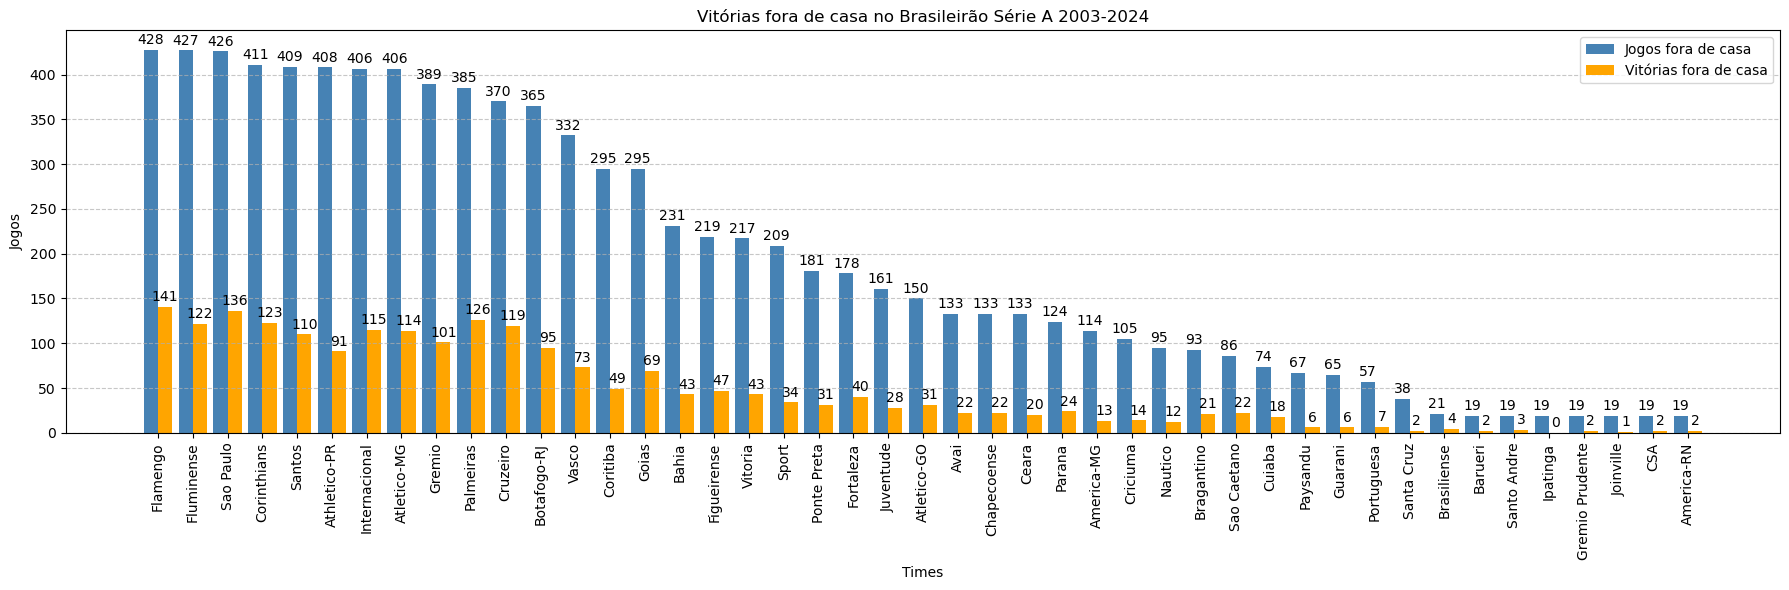

In [98]:
# Dados
visitante = partidasFora['visitante']
jogosFora = partidasFora['JogosFora']
vitoriasFora = partidasFora['VitoriasFora']

# Criar posições base
x = list(range(len(visitante)))
largura = 0.41  # Largura das barras

# Criar a figura
plt.figure(figsize=(18, 6))

# Criar barras com deslocamento manual no eixo X
bar = plt.bar([i - largura/2 for i in x], jogosFora, width=largura, label='Jogos fora de casa', color='steelblue')
bar2 = plt.bar([i + largura/2 for i in x], vitoriasFora, width=largura, label='Vitórias fora de casa', color='orange')

# Adiciona os valores sobre as barras
plt.bar_label(bar, padding=2)
plt.bar_label(bar2, padding=2)

# Títulos e eixos
plt.title("Vitórias fora de casa no Brasileirão Série A 2003-2024")
plt.xlabel("Times")
plt.ylabel("Jogos")
plt.xticks(x, visitante, rotation=90)

# Grade e legenda
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

### **Qual Clube com Mais Gols Feitos como Visitante?**

In [99]:
#Agrupa os mandantes por visitante_Placar e faz a soma dos valores, depois ordena em ordem decrescente com ascending=False
golsVisitante = dataframe.groupby('visitante')['visitante_Placar'].sum().sort_values(ascending=False)
time_mais_gols = golsVisitante.idxmax()
qtd_gols = golsVisitante.max()

print(f"O time que mais fez gols como visitante foi o {time_mais_gols} com {qtd_gols} gols.")

O time que mais fez gols como visitante foi o Flamengo com 522 gols.


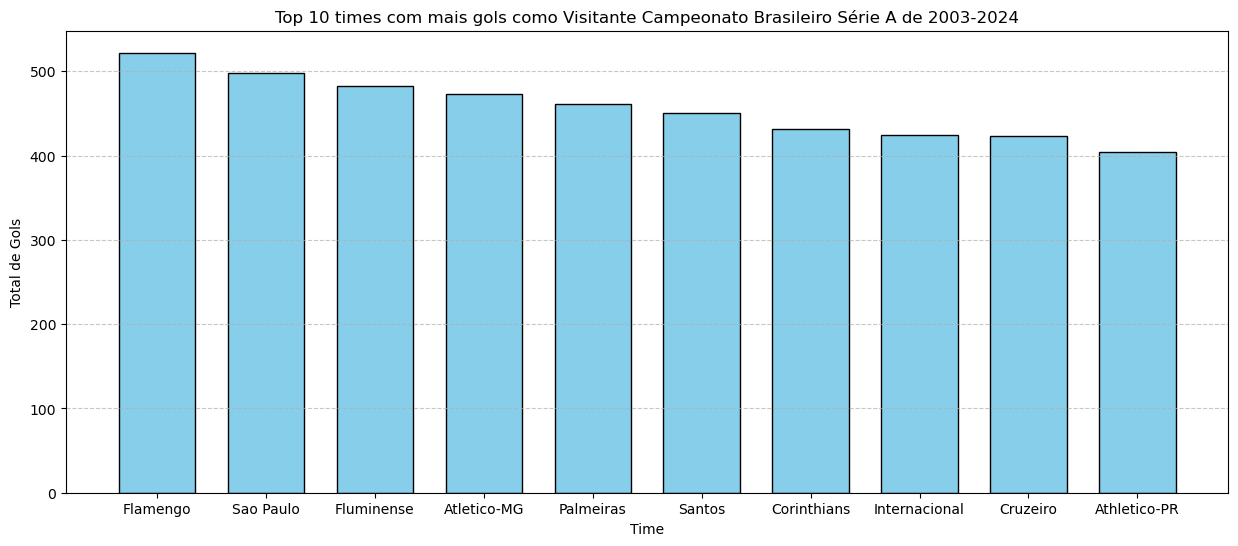

In [100]:
# Criar a figura e aumentar o tamanho
plt.figure(figsize=(15, 6))  # Largura de 15 polegadas e altura de 6 polegadas

# Criando o gráfico de barras utilizando a série 'golsMandante', que contém os times e seus respectivos gols
plt.bar(golsVisitante.head(10).index, golsVisitante.head(10).values, color='skyblue', edgecolor='black', width=0.7)

# Título do gráfico
plt.title("Top 10 times com mais gols como Visitante Campeonato Brasileiro Série A de 2003-2024")

# Título do eixo X
plt.xlabel("Time")

# Título do eixo Y
plt.ylabel("Total de Gols")

# Ativando o grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Exibe o gráfico
plt.xticks(rotation=0)  # Rotaciona os nomes dos times para melhor visualização
plt.show()

# 6 - **Quantos Jogos Terminaram sem Gols (0x0)?**

**Objetivo:**
   - Contabilizar o número de empates 0x0.
   - Gerar Gráfico de Pizza da Proporção de Empates 0x0.


In [101]:
# Contando as partidas que deram empate
partidasEmpate = dataframe[dataframe['vencedor'] == '-'].value_counts()
partidasEmpate.head(10)

ID    rodata  mandante      visitante    vencedor  arena                                     mandante_Placar  visitante_Placar  ano   gols
3     1       Flamengo      Coritiba     -          Maracanã                                 1                1                 2003  2       1
5587  23      Santa Cruz    Chapecoense  -         Arena de Pernambuco                       2                2                 2016  4       1
5962  22      Cruzeiro      Santos       -          Mineirão                                 1                1                 2017  2       1
5966  23      Atletico-MG   Palmeiras    -         Estádio Raimundo Sampaio                  1                1                 2017  2       1
5968  23      Sao Paulo     Ponte Preta  -          Morumbi                                  2                2                 2017  4       1
5969  23      Athletico-PR  Coritiba     -         Estádio Joaquim Américo Guimarães         1                1                 2017  2      

### **Quantidade de partidas terminada sem gols (0x0):**

In [102]:
# Contando as partidas que deram 0x0
partidasEmpateZeroaZero = dataframe[(dataframe['mandante_Placar'] == 0) & (dataframe['visitante_Placar'] == 0)].value_counts()
# Exibindo o total
print(f"A quantidade de empates em 0x0 no Brasileirão Série A de 2003 - 2024 foi de {partidasEmpateZeroaZero.sum()}")


A quantidade de empates em 0x0 no Brasileirão Série A de 2003 - 2024 foi de 691


In [103]:
#Numero total de empates
numeroEmpatesTotal = dataframe[dataframe['vencedor'] == '-'].value_counts()
numeroEmpatesTotal.sum()

2311

  ### **Gráfico de Pizza**: Relação Entre os Empates e os Empates Sem Gols - Campeonato Brasileiro Série A 2003-2024

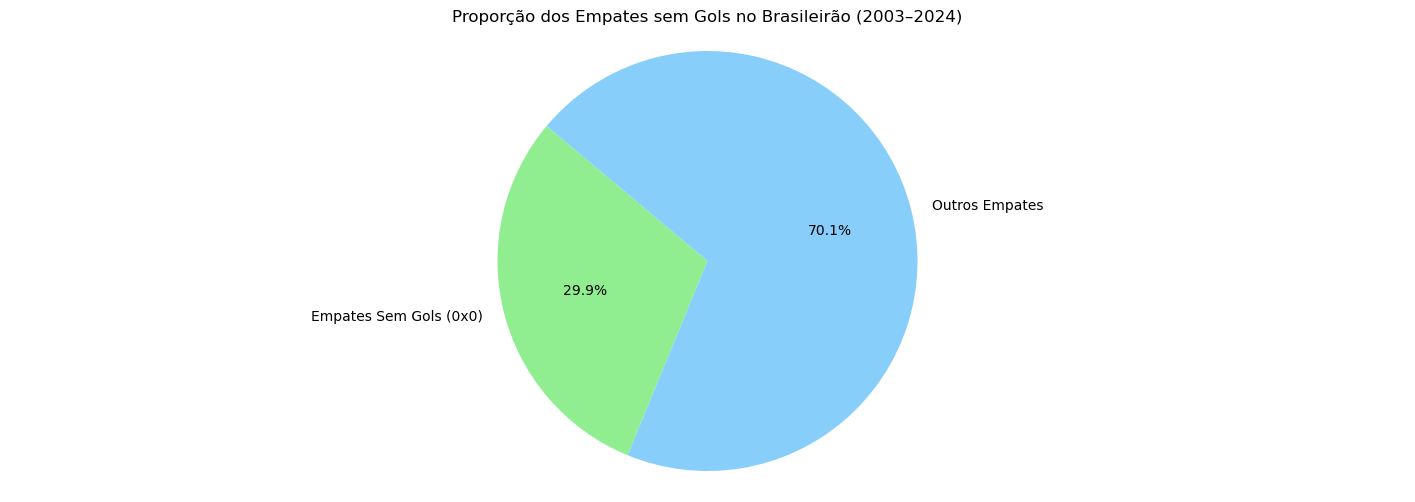

In [104]:
# Criar a figura
plt.figure(figsize=(18, 6))

empatesSemZeroaZero=(numeroEmpatesTotal.sum())-(partidasEmpateZeroaZero.sum())

labels = ['Empates Sem Gols (0x0)', 'Outros Empates']
sizes = [partidasEmpateZeroaZero.sum(), empatesSemZeroaZero]
colors = ['lightgreen', 'lightskyblue']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proporção dos Empates sem Gols no Brasileirão (2003–2024)')
plt.axis('equal')  # Garante círculo
plt.show()

In [105]:
print(f"Total de partidas no Brasileirão (2003–2024): {numeroPartidas}")
print(f"Total de empates com gols: {empatesSemZeroaZero}")
print(f"Total de empates que terminaram sem gols: {partidasEmpateZeroaZero.sum()}")

Total de partidas no Brasileirão (2003–2024): 8769
Total de empates com gols: 1620
Total de empates que terminaram sem gols: 691


### **Gráfico de Pizza**: Relação Entre Jogos Sem Gols e Jogos com Gols - Campeonato Brasileiro Série A 2003-2024

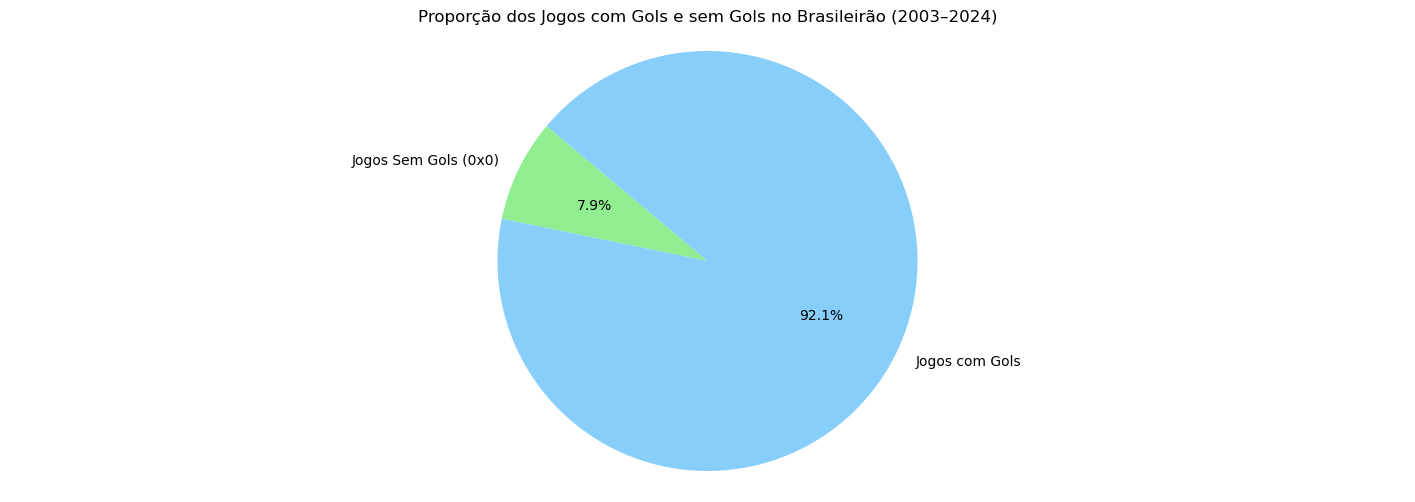

In [106]:
# Criar a figura
plt.figure(figsize=(18, 6))

# Jogos com gols
partidasComGols = numeroPartidas - partidasEmpateZeroaZero.sum()

labels = ['Jogos Sem Gols (0x0)', 'Jogos com Gols']
sizes = [partidasEmpateZeroaZero.sum(), partidasComGols]
colors = ['lightgreen', 'lightskyblue']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proporção dos Jogos com Gols e sem Gols no Brasileirão (2003–2024)')
plt.axis('equal')  
plt.show()

In [107]:
print(f"Total de partidas no Brasileirão (2003–2024): {numeroPartidas}")
print(f"Total de partidas com gols: {partidasComGols}")
print(f"Total de partidas que terminaram sem gols: {partidasEmpateZeroaZero.sum()}")

Total de partidas no Brasileirão (2003–2024): 8769
Total de partidas com gols: 8078
Total de partidas que terminaram sem gols: 691


### **Gráfico de Linhas**: Número de Empates por Ano - Campeonato Brasileiro Série A 2003-2024

In [108]:
# Contando as partidas que deram empate por ano
partidasEmpate = dataframe[dataframe['vencedor'] == '-'].value_counts().groupby('ano').size()
partidasEmpate


ano
2003    142
2004    140
2005    103
2006     97
2007     90
2008     96
2009    102
2010    118
2011    105
2012    105
2013    108
2014     92
2015     91
2016     94
2017    103
2018    110
2019     98
2020     78
2021    143
2022    108
2023     98
2024     90
Name: count, dtype: int64

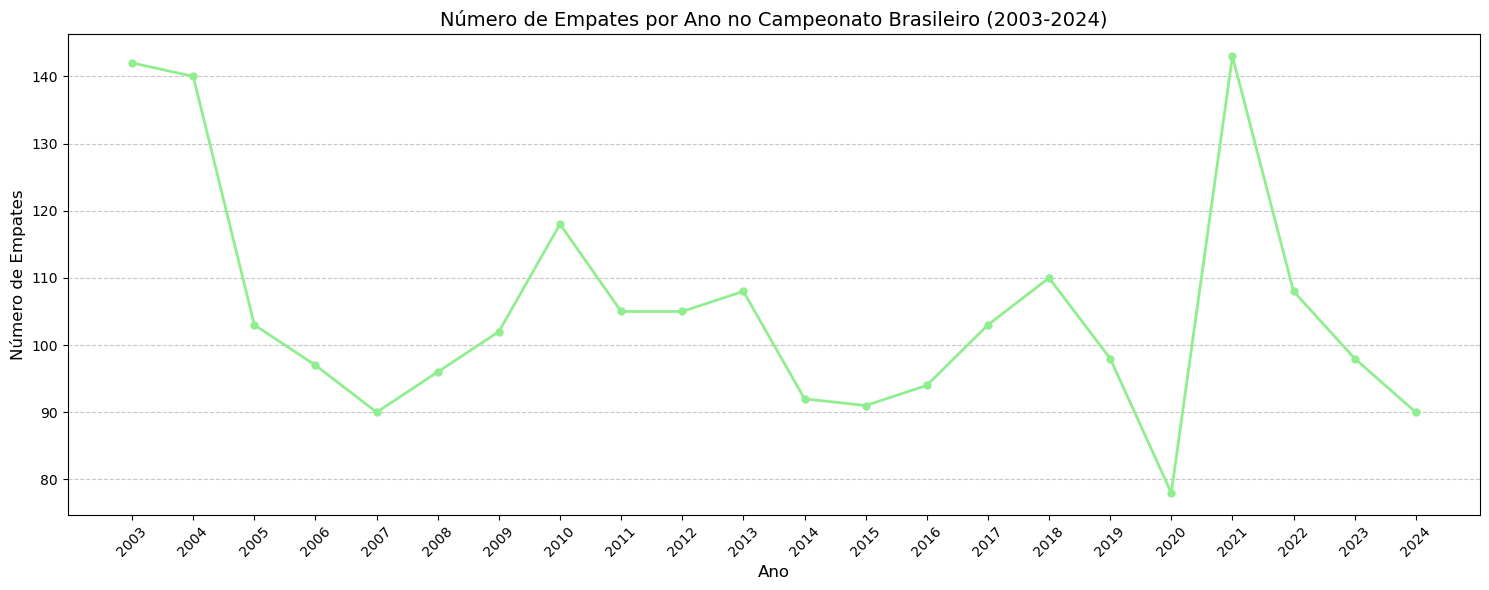

In [109]:
# Criando o gráfico de linha
plt.figure(figsize=(15, 6))  # Tamanho da figura
plt.plot(partidasEmpate.index, partidasEmpate.values, marker='o', color='lightgreen', linestyle='-', linewidth=2, markersize=5)

# Adicionando título e rótulos
plt.title("Número de Empates por Ano no Campeonato Brasileiro (2003-2024)", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Número de Empates", fontsize=12)

# Exibindo o gráfico
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Adiciona uma grade para facilitar a leitura
plt.xticks(range(2003, 2025, 1), rotation=45)  # Definindo os ticks de 1 em 1 ano
plt.tight_layout()  # Ajusta o layout para não cortar os labels
plt.show()


In [110]:
#pORCENTAGEM DE EMPATES DO BRASILEIRAO
partidasEmpate = dataframe[dataframe['vencedor'] == '-'].value_counts().groupby('ano').size().sum()
print(f"Total de partidas no Brasileirão (2003–2024): {numeroPartidas}")
print(f"Total de empates com e sem gols no Brasileirão (2003–2024): {partidasEmpate}")
print(f"Porcentagem de empates (2003–2024): {(partidasEmpate / numeroPartidas) * 100:.2f}%")



Total de partidas no Brasileirão (2003–2024): 8769
Total de empates com e sem gols no Brasileirão (2003–2024): 2311
Porcentagem de empates (2003–2024): 26.35%


# 7 - **Qual o maior Número de Gols em uma Partida?**

In [111]:
# Encontrar o jogo com mais gols
jogo_mais_gols = dataframe.loc[dataframe['gols'].idxmax()]

# Exibir o jogo com mais gols
print(f"O jogo com mais gols foi entre {jogo_mais_gols['mandante']} e {jogo_mais_gols['visitante']}, com um total de {jogo_mais_gols['gols']} gols no ano de {jogo_mais_gols['ano']} - Placar: {jogo_mais_gols['mandante_Placar']} x {jogo_mais_gols['visitante_Placar']}.")

O jogo com mais gols foi entre Bahia e Santos, com um total de 11 gols no ano de 2003 - Placar: 4 x 7.


In [112]:
# Ordena o DataFrame pelos gols, de forma decrescente, ascending define a ordenacao(crescente/decrescente)
dataframe_ordenado = dataframe.sort_values(by='gols', ascending=False)

# Iterando pelos 3 jogos com mais gols
for i in range(3):
    jogo_mais_gols = dataframe_ordenado.iloc[i]
    print(f"TOP {i+1} - {jogo_mais_gols['mandante']} x {jogo_mais_gols['visitante']}, {jogo_mais_gols['gols']} gols em {jogo_mais_gols['ano']} - Placar: {jogo_mais_gols['mandante_Placar']} x {jogo_mais_gols['visitante_Placar']}.")


TOP 1 - Bahia x Santos, 11 gols em 2003 - Placar: 4 x 7.
TOP 2 - Athletico-PR x Vasco, 10 gols em 2006 - Placar: 6 x 4.
TOP 3 - Goias x Bahia, 10 gols em 2023 - Placar: 4 x 6.


# 8 - **Qual será a média de gols do Campeonato Brasileiro de 2025?**

**Análise Preditiva de Gols na Próxima Temporada**

- **Objetivo**: Treinar um modelo preditivo com base nos dados históricos e gerar uma previsão utilizando Regressão Linear.

Escolhi realizar uma análise preditiva simples para aplicar alguns conhecimentos adquiridos nas aulas e, também, para aprender mais sobre esse tipo de análise, já que é um tema com o qual eu nunca havia trabalhado antes.

Para essa análise, optei por utilizar os dados que exportei anteriormente. Inicialmente, tive problemas para puxar os dados diretamente, então pedi ao ChatGPT para criar as listas **'anos'** e **'media_gols'** para mim, o que facilitou o processo, pois estava enfrentando alguns problemas.
 

Média geral de gols por partida no Campeonato Brasileiro Série A (2003–2024): 2.55 gols por jogo
O desvio padrão da média de gols ao longo dos anos é: 0.24
Erro médio absoluto: 0.09
A previsão da média de gols para 2025 é: 2.25
O intervalo de confiança para a previsão de 2025 é entre 2.01 e 2.49 gols.

 


c:\Users\gabri\OneDrive\Documentos\DataScience\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


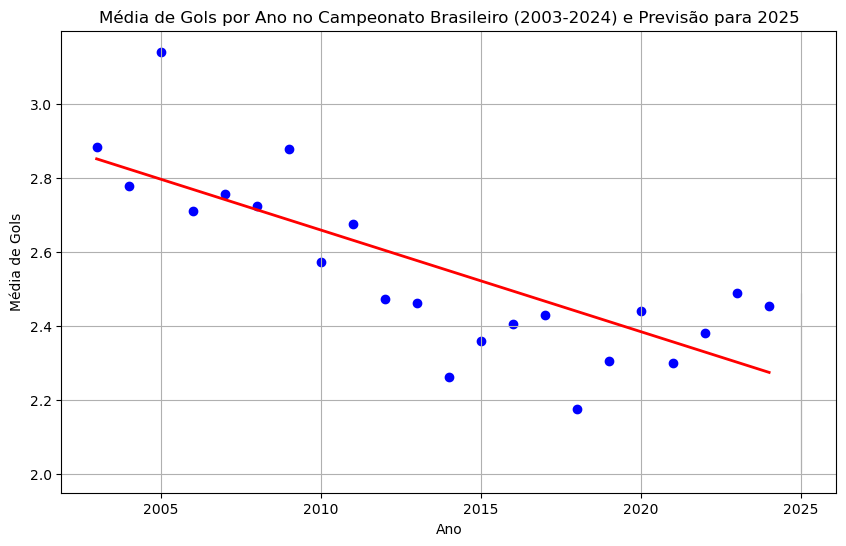

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Dados fornecidos
anos = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
media_gols = [2.884058, 2.778986, 3.140693, 2.710526, 2.755263, 2.723684, 2.878947, 2.573684, 2.676316, 2.473684, 2.463158, 2.263158,
              2.360526, 2.406332, 2.428947, 2.176316, 2.305263, 2.440299, 2.300813, 2.381579, 2.489474, 2.453297]

# Criando o DataFrame
data = pd.DataFrame({'ano': anos, 'media_gols': media_gols})

# Dividindo os dados em variáveis independentes (ano) e dependentes (média de gols)
X = pd.DataFrame({'ano': anos})  # Ano como variável independente
y = data['media_gols']  # Média de gols como variável dependente

print(f"Média geral de gols por partida no Campeonato Brasileiro Série A (2003–2024): {mediaGolsCampeonato:.2f} gols por jogo")
# Cálculo do desvio padrão dos dados históricos
desvio_padrao = y.std()
print(f"O desvio padrão da média de gols ao longo dos anos é: {desvio_padrao:.2f}")

# Dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões com o modelo
y_pred = model.predict(X_test)

# Avaliando a performance do modelo
mae = mean_absolute_error(y_test, y_pred)
print(f"Erro médio absoluto: {mae:.2f}")

# Prevendo a média de gols para o ano de 2025
ano_2025 = np.array([[2025]])
previsao_2025 = model.predict(ano_2025)
print(f"A previsão da média de gols para 2025 é: {previsao_2025[0]:.2f}")

# Para incorporar o desvio padrão, podemos adicionar a variabilidade à previsão de 2025
# Intervalo de confiança (para uma margem de erro baseada no desvio padrão)
margem_erro = desvio_padrao
intervalo_inferior = previsao_2025 - margem_erro
intervalo_superior = previsao_2025 + margem_erro

print(f"O intervalo de confiança para a previsão de 2025 é entre {intervalo_inferior[0]:.2f} e {intervalo_superior[0]:.2f} gols.\n\n ")

# Visualizando a linha de tendência
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')  # Dados reais
plt.plot(X, model.predict(X), color='red', linewidth=2)  # Linha de regressão
plt.title('Média de Gols por Ano no Campeonato Brasileiro (2003-2024) e Previsão para 2025')
plt.xlabel('Ano')
plt.ylabel('Média de Gols')
plt.grid(True)

# Plotando intervalo de confiança para 2025
plt.fill_between([2025, 2025], intervalo_inferior[0], intervalo_superior[0], color='gray', alpha=0.3)
plt.show()
